In [7]:
import numpy as np
import matplotlib.pyplot as plt
from jax import random
from helper_functions import *
from scipy.linalg import block_diag

In [21]:
layers = [(17, 8), (11, 5)]

P = 0
for n_left, n_right in layers:
    P += n_left*n_right

print('Parameters:', P)

Parameters: 191


In [22]:
# block 1
alpha = 1.991
n_left, n_right = layers[0]
eigs_left = [1 / (i + 1)**alpha for i in range(n_left)]
eigs_right = [1 / (i + 1)**alpha for i in range(n_right)]
block1 = [initialise_g(n_left, n_right, jax.random.PRNGKey(24), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix1 = KP_sum(block1)

# block 2
n_left, n_right = layers[1] 
eigs_left = [np.exp(-i*0.9) for i in range(n_left)]
eigs_right = [np.exp(-i*0.9) for i in range(n_right)]
block2 = [initialise_g(n_left, n_right, jax.random.PRNGKey(18), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix2 = KP_sum(block2)

G = block_diag(matrix1, matrix2)

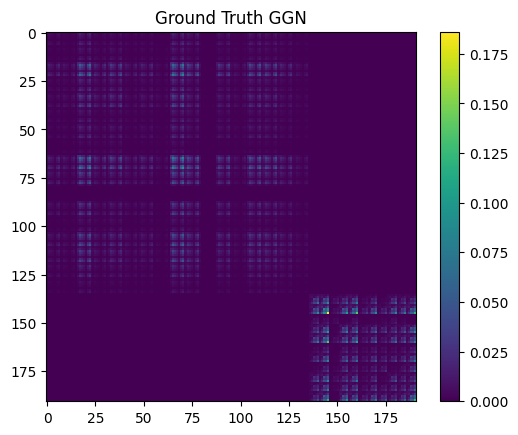

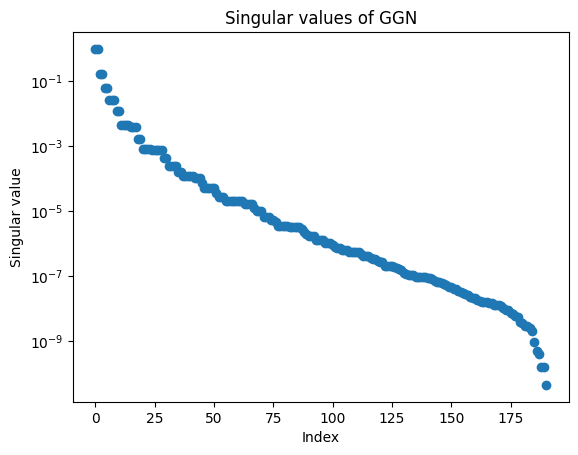

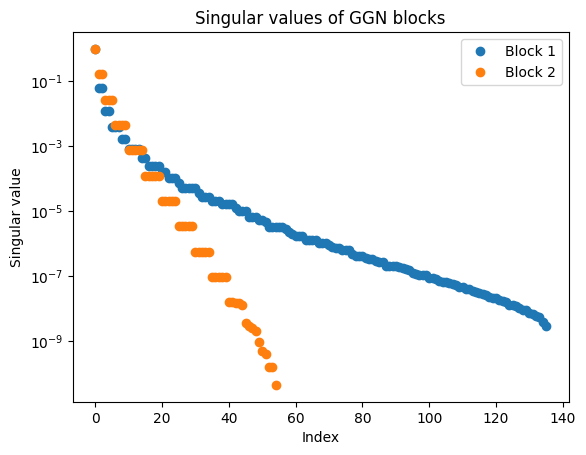

In [23]:
plt.imshow(np.abs(G), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Ground Truth GGN')
plt.show()

_, s, _ = np.linalg.svd(G)
plt.plot(s, 'o')
plt.yscale('log')
plt.title('Singular values of GGN')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.show()

_, s, _ = np.linalg.svd(matrix1)
plt.plot(s, 'o')
_, s, _ = np.linalg.svd(matrix2)
plt.plot(s, 'o')
plt.yscale('log')
plt.title('Singular values of GGN blocks')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.legend(['Block 1', 'Block 2'])
plt.show()

In [24]:
learned_G, losses, losses1, losses2 = learn_G_multiple_layers(layers, G, iters=25000, K=20)
block1 = KP_sum(learned_G[0])
block2 = KP_sum(learned_G[1])
learned_G_matrix = block_diag(block1, block2)

Iteration: 0, Loss: 1042.302734375 for layer [False]
Iteration: 100, Loss: 174.53836059570312 for layer [ True]
Iteration: 200, Loss: 950.6821899414062 for layer [False]
Iteration: 300, Loss: 878.6989135742188 for layer [False]
Iteration: 400, Loss: 151.71823120117188 for layer [ True]
Iteration: 500, Loss: 142.9794158935547 for layer [ True]
Iteration: 600, Loss: 781.5233154296875 for layer [False]
Iteration: 700, Loss: 120.3971176147461 for layer [ True]
Iteration: 800, Loss: 590.0391235351562 for layer [False]
Iteration: 900, Loss: 678.3299560546875 for layer [False]
Iteration: 1000, Loss: 108.65199279785156 for layer [ True]
Iteration: 1100, Loss: 566.630615234375 for layer [False]
Iteration: 1200, Loss: 555.0198974609375 for layer [False]
Iteration: 1300, Loss: 527.6906127929688 for layer [False]
Iteration: 1400, Loss: 104.87591552734375 for layer [ True]
Iteration: 1500, Loss: 88.05416870117188 for layer [ True]
Iteration: 1600, Loss: 82.58567810058594 for layer [ True]
Iteration

C:\Users\oconn\AppData\Local\Temp\ipykernel_21408\138075179.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 1])  # prevent tight_layout from overlapping colorbar


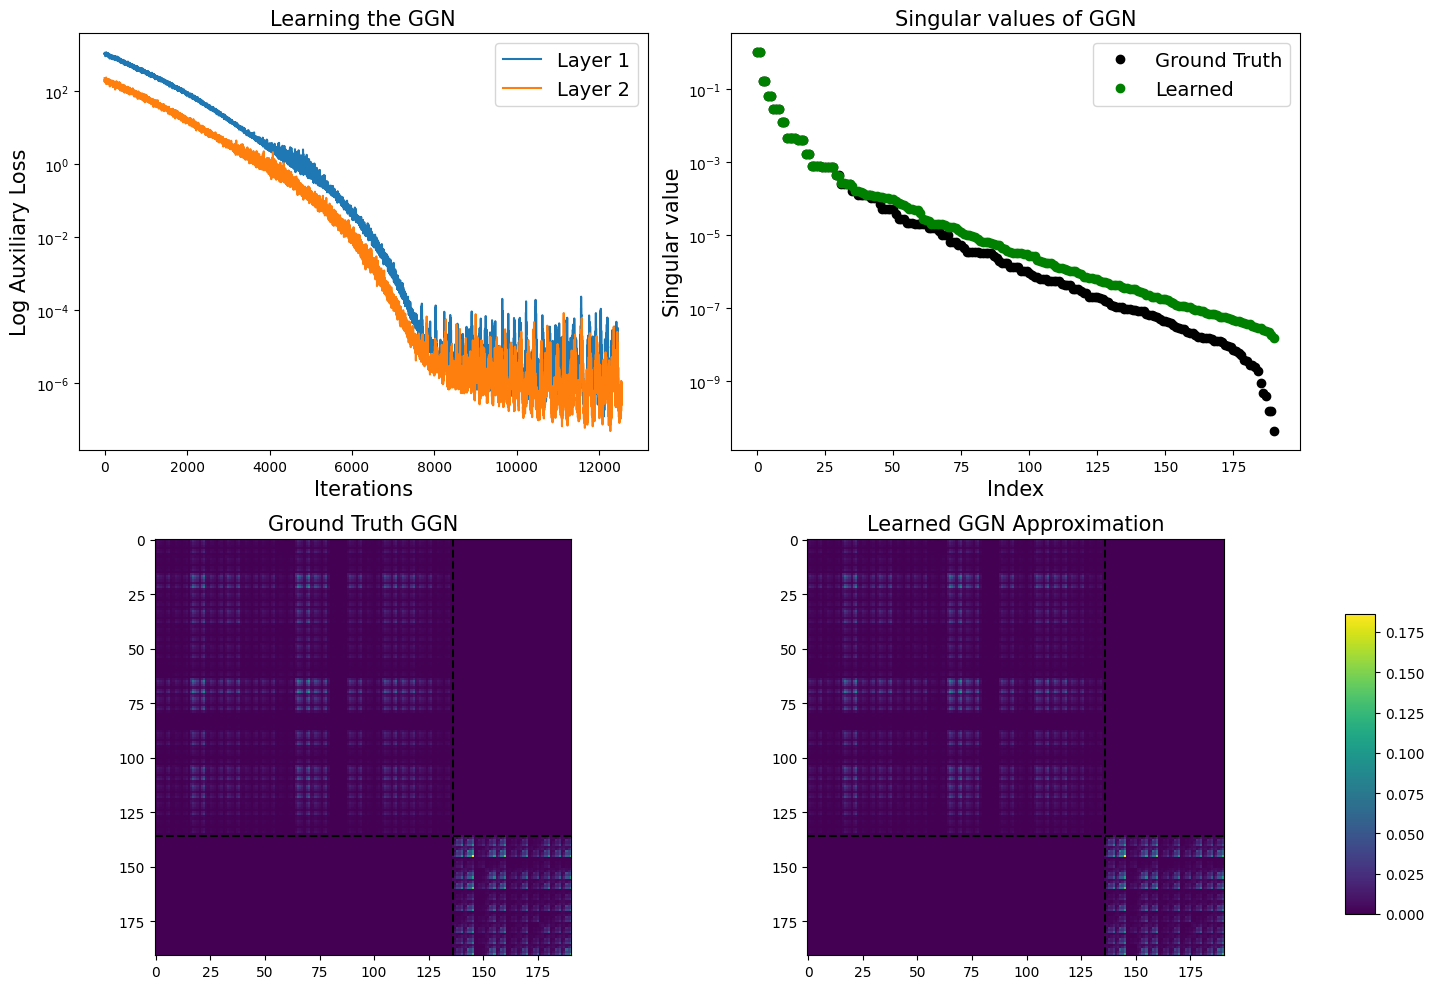

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

n, m = layers[0]
line = n*m

axs[0][0].plot(losses1, label='Layer 1')
axs[0][0].plot(losses2, label='Layer 2')
axs[0][0].legend(fontsize=14)
axs[0][0].set_yscale('log')
axs[0][0].set_xlabel('Iterations', fontsize=15)
axs[0][0].set_ylabel('Log Auxiliary Loss', fontsize=15)
axs[0][0].set_title('Learning the GGN', fontsize=15)

_, s, _ = np.linalg.svd(G)
axs[0][1].plot(s, 'o', label='Ground Truth', color='k')
_, s_learned, _ = np.linalg.svd(learned_G_matrix)
axs[0][1].plot(s_learned, 'o', label='Learned', color='g')
axs[0][1].set_yscale('log')
axs[0][1].set_xlabel('Index', fontsize=15)
axs[0][1].set_ylabel('Singular value', fontsize=15)
axs[0][1].set_title('Singular values of GGN', fontsize=15)
axs[0][1].legend(fontsize=14)

axs[1][0].imshow(abs(G), cmap='viridis', interpolation='nearest')
axs[1][0].set_title('Ground Truth GGN', fontsize=15)
axs[1][0].axvline(x=line, color='k', linestyle='--')
axs[1][0].axhline(y=line, color='k', linestyle='--')

im1 = axs[1][1].imshow(abs(learned_G_matrix), cmap='viridis', interpolation='nearest')
axs[1][1].set_title('Learned GGN Approximation', fontsize=15)
axs[1][1].axvline(x=line, color='k', linestyle='--')
axs[1][1].axhline(y=line, color='k', linestyle='--')

fig.subplots_adjust(right=0.88, wspace=0.3)  # Make space for colorbar
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax) 

plt.tight_layout(rect=[0, 0, 0.88, 1])  # prevent tight_layout from overlapping colorbar

plt.savefig('synthetic_CASE2_final.png', dpi=300)
plt.show()